# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats as st
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

#Defining the functions



In [ ]:
def abline(a, b,):
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = a * x_vals + b
    plt.plot(x_vals, y_vals, 'r', linewidth=2)

def abline_sample(a, b):
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = a * x_vals + b
    plt.plot(x_vals, y_vals, 'b', linewidth = 1, alpha = 0.1, zorder=0)

def mse_loss(y, x, theta):
    y_pred = x @ theta
    return (2/len(y_pred)) * np.sum((y - y_pred)**2)

def mse_grad(y, x, theta):
     y_pred = x @ theta
     return -1/len(y_pred) * ((y - y_pred) @ x)

def grad_descent(y, x, theta, lr, iters):
    eps = 0.00001
    next_theta = theta

    for _ in range(iters):
        curr_theta = next_theta
        next_theta = curr_theta - lr * mse_grad(y, x, curr_theta)

        if np.linalg.norm(curr_theta - next_theta) <= eps:
            return curr_theta, _

# Intro

This notebook was created in order to aggregate all the information that I've learned from the following resources:
1. An Introduction to Statistical Learning - https://www.statlearning.com/
2. STAT 501 - https://online.stat.psu.edu/stat501/
3. An Introduction to Statistics - https://work.thaslwanter.at/Stats/html/statsModels.html
4. Andrew Ng's CS299 Lecture - https://web.archive.org/web/20180618211933/http://cs229.stanford.edu/notes/cs229-notes1.pdf

***This notebook isn't intended to show how to perform linear regression effectively, but rather how linear regression works and highlight its main aspects***

# Simple Linear Regression

## Equation

The equation of SLR is, well, quite simple: <p>
$$Y = B_0 + B_1X + ϵ,$$ <p>
where $B_0$ - intercept, $B_1$ - slope, $ϵ$ - error/noise (not to be confused with residuals that are also frequently referenced as the error). $B_0$ and $B_1$ are also called coefficients, weights or parameters. <p>

Interpretation: <br>
$Β_0$ is the average value of $Y$ when $β_1$ is equal to zero <br>
$Β_1$ is the average change in $Y$ corresponding to a one unit increase in $X$ <br>
$ϵ$ is the error that counts for everything that isn't included into our model, like ommited variables, measurment errors, etc.

## Geometric meaning

In [ ]:
# initializing data
np.random.seed(1)
x = np.random.rand(30) * 5
y = 3 + 2 * x + np.random.normal(0, 1, 30)
slope = np.polyfit(x, y,1)[0]
intercept = np.polyfit(x, y,1)[1]

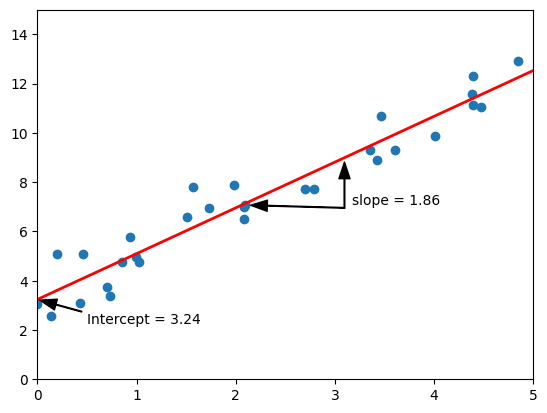

In [ ]:
fig, ax = plt.subplots()

x_initial = x[10]
y_initial = y[10]
x_increase = x_initial + 1
y_increase = y_initial + slope

ax.scatter(x, y)
abline(slope, intercept)
ax.set_xlim([0,5])
ax.set_ylim(0,15)
ax.annotate(
        f'Intercept = {intercept:.2f}',
        xy=(0, intercept),
        xytext=(0.5, intercept - 1),
        arrowprops=dict(facecolor='black', shrink=0.05, width = 0.5, headwidth = 8)
        )
ax.annotate(
        f'slope = {slope:.2f}',
        xy=(x_initial, y_initial),
        xytext=(x_increase + 0.08, y_initial),
        arrowprops=dict(facecolor='black', shrink=0.05, width=0.5, headwidth=8)
        )

ax.annotate(
        ' ',
        xy=(x_increase, y_increase),
        xytext=(x_increase, y_initial - 0.8),
        arrowprops=dict(facecolor='black', shrink=0.05, width=0.5, headwidth=8)
        )

plt.show()

We can also refer to the following picture, that more thoroughly explains the geometric meaning of SLR:

![](https://drive.google.com/uc?id=1ca8YBbWOgZaryX-MGL9VYHTtwgF01LCE)

## Coefficient estimation

Given that our model contains uncertainty, we can't directly derive the model parameters. We have to solve an optimization problem to find the parameters $\hat{B_0}, \hat{B_1}$ that approximate the true $B_0, B_1$ the best. <p>
$$\hat{θ} = argmin(J(θ|X,Y)),$$ <p>
where $J$ - cost(loss) function, $\hat{θ}$ - model parameters $\hat{B_0}$, $\hat{B_1}$. <br>
The two most common loss functions for SLR are RSS(residual sum of squares) and MSE (mean squared error). <p>
$$RSS = ∑(y_i - \hat{y})^2 = ϵ_1^2 + ϵ_2^2 + ... + ϵ_n^2$$ <br>
$$MSE = \frac{∑(y_i - \hat{y})^2}{n}$$ <p>

In SLR, the process of finding optimal model parameters is quite straight forward. We can find the best-fit parameters as follows: <p>
$$\hat{β_1} = \frac{∑(x_i - \bar{x})(y_i - \bar{y})}{∑(x_i - \bar{x})^2}$$ <br>
$$\hat{β_0} = \bar{y} - \hat{B_1}\bar{x}$$

In [ ]:
a = np.sum((x - np.mean(x)) * (y - np.mean(y))) / np.sum((x - np.mean(x))**2)
b = np.mean(y) - a * np.mean(x)

print('calculated manually')
print('-------------------')
print(f'Intercept = {b:.2f}, Slope = {a:.2f}\n')

X = sm.add_constant(x)
res = sm.OLS(y,X).fit()

print('calculated by statsmodels package')
print('-------------------')
print(f'Intercept = {res.params[0]:.2f}, Slope = {res.params[1]:.2f}')

calculated manually
-------------------
Intercept = 3.24, Slope = 1.86

calculated by statsmodels package
-------------------
Intercept = 3.24, Slope = 1.86


## Assessing the coefficient accurance

It's important to understand that coefficients that we find solving the optimization problem are yet approximation of the true population coefficients.

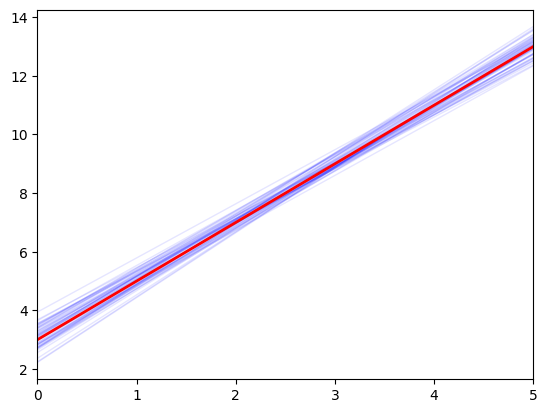

In [ ]:
a = []
b = []
for _ in range(50):
    xs = np.random.rand(30) * 5
    ys = 3 + 2 * xs + np.random.normal(0, 1, 30)
    a.append(np.polyfit(xs, ys,1)[0])
    b.append(np.polyfit(xs, ys,1)[1])

plt.xlim(0,5)
for a, b in zip(a, b):
    abline_sample(a, b)
abline(2, 3)

As we can see, the population regression line remains always the same $Y = 3 + 2X$, while the least squares regression line keeps changing over the iterations

To estimate how much approximated coefficients differ from the true coefficients on average we can calculate the standard error of the coefficients.

* Variability of residuals <p>
$$ \hat{σ}^2 = Var(ϵ) = MSE = \frac{RSS}{n-2}$$
* Standard deviation or standard error of residuals <p>
$$ \hat{σ} = RSE = \sqrt{MSE}$$
* Variability of model parameters
$$Var(\hat{B_0}) = MSE[\frac{1}{n} + \frac{\bar{x}^2}{∑(x_i - \bar{x})^2}]$$ <p>
$$Var(\hat{B_1}) = \frac{MSE}{∑(x_i - \bar{x})^2}$$
* Standard deviation or standard error of model parameters
$$SE(\hat{B_0}) = \sqrt{Var(\hat{B_0})}$$ <p>
$$SE(\hat{B_1}) = \sqrt{Var(\hat{B_1})}$$

In [ ]:
n = x.size
rss = np.polyfit(x,y,1,full=True)[1][0]
mse = rss / (n-2)
x_mean = np.mean(x)

var_b0 = mse * ((1/n) + (x_mean**2 / np.sum((x - x_mean)**2)))
var_b1 = mse / np.sum((x - x_mean)**2)
se_b0 = np.sqrt(var_b0)
se_b1 = np.sqrt(var_b1)

print('calculated manually')
print('-------------------')
print(f'Standard Error of the intercept: {se_b0:.2f}')
print(f'Standard Error of the slope: {se_b1:.2f}\n')

print('calculated by statsmodels package')
print('-------------------')
print(f'Standard Error of the intercept: {res.bse[0]:.2f}')
print(f'Standard Error of the slope: {res.bse[1]:.2f}')

calculated manually
-------------------
Standard Error of the intercept: 0.25
Standard Error of the slope: 0.10

calculated by statsmodels package
-------------------
Standard Error of the intercept: 0.25
Standard Error of the slope: 0.10


## Assessing the model accurance

The most common metric for measuring SLR model accurance is the coefficient of determination $R^2$:
$$ R^2 = \frac{TSS - RSS}{TSS},$$ <p>
where $TSS = ∑(y_i - \bar{y})^2$. <p>

Interpritation: <br>
$TSS$ (total sum of squares) - total variability in the response before the regression. <br>
$RSS$ (residual sum of squares) - variability that left unexplained after the regression. <p>

Therefore, $R^2$ is the measure that indicates how much the variation of the response $Y$ is explained by our regression model given $X$.

In [ ]:
tss = np.sum((y - np.mean(y))**2)
rss = np.polyfit(x,y,1,full=True)[1][0]

R_squared = (tss - rss) / tss
print('calculated manually')
print('-------------------')
print(f'R squared = {R_squared:.2f}\n')
print('calculated by statsmodels package')
print('-------------------')
print(f'R squared = {res.rsquared:.2f}\n')

calculated manually
-------------------
R squared = 0.93

calculated by statsmodels package
-------------------
R squared = 0.93



# Multiple Linear Regression

The core concepts are inherited from the simple linear regression, but with some changes and addititons

## Equation



The equation of multiple linear regression can be expressed in a scalar form: <p>
$$Y = B_0 + B_1X_1 + B_2X_2 + ... + B_pX_p + ϵ$$ <p>
But it would be better to switch to the matrix notation:
$$Y = Xθ + ϵ,$$ <p>
where $X$ - design matrix with constant, $θ$ - vector of weights, $ϵ$ - vector of errors. <p>
The relationship between  X  and  Y  may be not linear, but untill the model remains linear in coefficients, it's still a linear model. This fact allows us to perfrom non-linear transformations of variables, e.g. adding squared/cubed versions of regressors and intercation terms.

## Coefficient estimation

As in the SLR, we have to define the loss function to solve the optimization problem. In MLR the most optimal loss function is $MSE$. This is due to the various reasons, but mainly because MSE allows to measure the loss w.r.t. the sample size, unlike RSS, and yeilds much smaller values that simplify calculcation of the gradient. <p>
$$MSE = \frac{∑(y_i - \hat{y})^2}{n}$$

One thing to mention, even if we want to solve $Y = Xθ + ϵ$, we're actually solving $Y = Xθ$, because $ϵ$ is an *irreducible error term*.

### Analytical Method

#### Least squares solution

An analytical solution to the optimization problem: <p>
$$\hat{θ} = (X'X)^{-1}X'Y,$$ <p>
But there are some pitfalls and stumbling blocks with this method:
* The inverse is hard to compute if the design matrix is large
* The inverse can't be found if there are linearly dependent columns in the design matrix
* Even if there are no linearly dependent columns, but columns with high correlation, the method can yeilds an unreliable estimate of the weights.
* The method is not applicable for L1 and Elastic Net regularization

In [ ]:
X, y = make_regression(n_samples=50, n_features=4, n_informative=4, noise=10, random_state=1)

In [ ]:
X = np.c_[np.ones(len(X)), X]
mparams = np.linalg.inv(X.T @ X) @ (X.T @ y)
res = sm.OLS(y,X).fit()

print('calculated manually')
print('-------------------')
print(f'Model parameters = {mparams}\n')
print('calculated by statsmodels package')
print('-------------------')
print(f'Model parameters  = {res.params}\n')

calculated manually
-------------------
Model parameters = [-1.02723826 48.72370435 66.30723689 33.90532805 88.44610268]

calculated by statsmodels package
-------------------
Model parameters  = [-1.02723826 48.72370435 66.30723689 33.90532805 88.44610268]



### Numerical Method

#### Gradient descent solution

The gradient $∇f$ is a vector of all partial derivatives of a scalar-valued function $f(x_1...x_k)$, which can also be imagined as a slope of the tangent line in the point $x_i$, pointing in the direction of the steepest increase of the function $f(x)$

The gradient descent update rule: <p>
$$θ_{k+1} = θ_k - ŋ∇J(θ),$$ <p>
where $ŋ$ - the learning rate, which regulate the rate of descent along the gradient, $∇J(θ)$ - the gradient of the loss function w.r.t. the model parameters

![](https://vitalflux.com/wp-content/uploads/2020/10/Screenshot-2020-10-09-at-2.22.43-PM.png)

Gradient descent algorithm can be described as follows:
1. Pick any starting point at random
2. Descent the gradient iteratively applying the update rule
3. When the gradient descent converges break the cycle: $||θ_k - θ_{k+1}|| < ϵ$



It's important to undestand that for gradient descent $J(θ|X,Y)$ and $αJ(θ|X,Y)$
yeild the same argmin, unless $α$ = 0. So it follows that all of these functions yeild the same optimal $θ$: <p>
$$MSE = \frac{1}{n}∑(y_i - \hat{y})^2; MSE = \frac{1}{2n}∑(y_i - \hat{y})^2; MSE = \frac{1}{n-p}∑(y_i - \hat{y})^2$$ <p>

Let's pick $MSE = \frac{1}{2n}||Y - Xθ||^2 = \frac{1}{2n}(Y - Xθ)'(Y - Xθ) = \frac{1}{2n}∑(y_i - x_iθ)^2$ because it simplifies calculcation of the gradient. <p>
The gradient of MSE is calculated as follows: <p>
$$\frac{∂MSE}{∂θ} = \frac{1}{2n}∑\frac{∂}{∂θ}(y_i - x_iθ)^2 * \frac{∂}{∂θ}(y_i - x_iθ) = \frac{2}{2n}∑(y_i - x_iθ)*-x_i = -\frac{1}{n}(Y - Xθ)X$$ <p>
Here we employed the chain and product rule of partial derivatives.


In [ ]:
theta = np.random.randn(X.shape[1])
fitted_params, epoch = grad_descent(y, X, theta, 0.1, 1000)

print('calculated manually')
print('-------------------')
print(f'Model parameters = {fitted_params}\nEpoch = {epoch}\n')
print('calculated by statsmodels package')
print('-------------------')
print(f'Model parameters  = {res.params}\n')

calculated manually
-------------------
Model parameters = [-1.02711083 48.72367689 66.30704408 33.90530792 88.44601096]
Epoch = 317

calculated by statsmodels package
-------------------
Model parameters  = [-1.02723826 48.72370435 66.30723689 33.90532805 88.44610268]



An almost exact match of the parameters has been achieved

## Assessing significance of variables

In the multi dimensional space we're actually concerned with two questions:
1. Is there a relationship between response and predictors? <br>
In short, we're interested to test if all of the model parameters are equal to zero, i.e. whether $B_1 = B_2 = B_p = 0$. <br>
We set the following hypotheses: <p>
$$H_0: B_1 = B_2 = B_p = 0$$ <p>
$$H_1: at \ least \ one \ B_j \ is \ not \ zero$$ <p>
Then, we compute the $F-statistic$: <p>
$$F=\frac{(TSS-RSS)/df_{mod}}{RSS/df_{res}}$$ <p>
If $H_0$ is true, we except $F-statistic$ to take on the value close to one. Else, greater than one.
2. Which specific variables have a noticeable relationship with the response? <br>
We set the following hypotheses: <p>
$$H_0: B_j=0$$ <p>
$$H_1: B_j\neq0$$ <p>
Then, we compute the $t-statistic$: <p>
$$t = \frac{(sameple \ coefficient - hypothesized \ value)}{SE \ of \ coefficient} = \frac{b_j - 0}{SE(b_j)}$$ <p>
For the calculated statistic value, then the $p-value$ is found, and if it is less than the set $alpha$, $H_0$ is rejected.


In [ ]:
residuals = y - res.predict()
rss = np.sum(residuals**2)
tss = np.sum((y - np.mean(y))**2)
n, p = X.shape
df_mod = p - 1
df_res = n - p

f_statistic = ((tss - rss) / df_mod) / (rss / df_res)

print('calculated manually')
print('-------------------')
print(f'Model parameters = {f_statistic}\n')
print('calculated by statsmodels package')
print('-------------------')
print(f'Model parameters  = {res.fvalue}\n')

calculated manually
-------------------
Model parameters = 751.5284728643294

calculated by statsmodels package
-------------------
Model parameters  = 751.5284728643296



In [ ]:
t_stat_values = res.params / res.bse
p_values = 2 * (1 - st.t.cdf(abs(t_stat_values), df_res))

print('calculated manually')
print('-------------------')
print(f'Model parameters = {t_stat_values}\n{[round(val,2) for val in p_values]}\n')
print('calculated by statsmodels package')
print('-------------------')
print(f'Model parameters  = {res.tvalues}\n{[round(val, 2) for val in res.pvalues]}')

calculated manually
-------------------
Model parameters = [-0.55939218 28.7097588  29.52735672 17.52058882 46.77157522]
[0.58, 0.0, 0.0, 0.0, 0.0]

calculated by statsmodels package
-------------------
Model parameters  = [-0.55939218 28.7097588  29.52735672 17.52058882 46.77157522]
[0.58, 0.0, 0.0, 0.0, 0.0]


Note for calculation of the $p-value$: <br>
The CDF is the cumulative sum of the PDF. We are interested in the area under the right hand tail, beyond our t statistic, t, so we subtract the cumulative sum up to that statistic from one in order to obtain the tail probability on the other side. We then multiply this tail probability by two to obtain a two-tailed probability.

## Assessing the coefficient accurance

* Variance of residuals <p>
$$ \hat{σ}^2 = Var(ϵ) = MSE = \frac{RSS}{n-p}$$
* Standard deviation or standard error of residuals <p>
$$ \hat{σ} = RSE = \sqrt{MSE}$$
* Variance of the model parameters
$$Cov(\hat{β})=σ^2*(X'X)^{−1}$$ <p>
$$Var(\hat{β}) = Diag(Cov(\hat{β}))$$
* Standard error of model parameters
$$SE(\hat{β}) = \sqrt{Var(\hat{β})}$$

In [ ]:
residuals = y - res.predict()
rss = np.sum(residuals**2)
n, p = X.shape
residual_variance = rss / (n - p)
cov_matrix = np.linalg.inv(X.T @ X) * residual_variance
standard_errors = np.sqrt(np.diag(cov_matrix))

print('calculated manually')
print('-------------------')
print(f'Model parameters = {standard_errors}\n')
print('calculated by statsmodels package')
print('-------------------')
print(f'Model parameters  = {res.bse}\n')

calculated manually
-------------------
Model parameters = [1.8363472  1.69711298 2.24562048 1.93517058 1.89102253]

calculated by statsmodels package
-------------------
Model parameters  = [1.8363472  1.69711298 2.24562048 1.93517058 1.89102253]



## Assesing the model accurance

In MLR, coefficient of determination $R^2$ is not a very good metric for assesing the model accurance due to the fact that in multi dimensional space $R^2$ is almost always increses with adding a new variable even if this variable is weakly assosiated with the response.
An unbiased equivalent of $R^2$ is $R_{adj}^2$:
$$R_{adj}^2 = 1 - \frac{(1-R^2)(n-1)}{n-p}$$

In [ ]:
residuals = y - res.predict()
rss = np.sum(residuals**2)
tss = np.sum((y - np.mean(y))**2)
R_squared = (tss - rss) / tss
R_squared_adj = 1 - (1 - R_squared) * (n - 1) / (n - p)

print('calculated manually')
print('-------------------')
print(f'R squared adj= {R_squared_adj:.4f}\n')
print('calculated by statsmodels package')
print('-------------------')
print(f'R squared ajd = {res.rsquared_adj:.4f}\n')

calculated manually
-------------------
R squared adj= 0.9839

calculated by statsmodels package
-------------------
R squared ajd = 0.9839



## Assumptions

### Asummptions about $X$ (important for prediction)

1. Linearity <br>
This assumption means that the change in the response $Y$ associated with one unit increase in predictor $X_j$ is constant, regardless of the value of $X_j$

2. Additivity <br>
This assumption means that when there are multiple variables, their total influence on the outcome is best stated by combining their effects together <br>
This naturally follows from the equation $Y = β_0 + β_1x_1 + β_2x_2 +  β_px_p + ϵ$, i.e. effect of each predictor variable on the response variable is additive and independent of other predictors. <p>
Mathematecally this can be stated as follows: <br>
![](https://drive.google.com/uc?id=16SD5xRcAmdPO34n-HyZAxAKoBVnkB9mj)
2. Strict exogenity <br>
This assumption can be rephrased as "X is not correlated with residuals", i.e. mathematically $Corr(X,ϵ)=0$. <br>
Exogeneity means that $X$ does not depend on the dependent variable $Y$; rather $Y$ depends on the $X$ and on $ϵ$, the model error. Since $Y$ depends on $ϵ$, this means that the $X$ are assumed to be independent of $Y$ hence $ϵ$. <p>
One of the frequent cause of endogeneity is omitted variable. <br>
Let's consider a multivariate regression model, $Y = β_0 + β_1x_1 + β_2x_2 + ϵ$ where $x_1$ is our coefficient of interest and $x_2$ denotes an unobservable variable with $Corr(x_1,x_2)\neq0$. Since we cannot observe $x_2$, the model we're evaluating is
$Y = β_0 + β_1x_1 + ϵ$. As we remember, $ϵ$ counts for everything that is not included in our model, therefore $x_2$ will appear in $ϵ$. This will result in $Corr(x_1, ϵ)\neq0$.

### Assumptions about $ϵ$ (important for interpretation)

1. Residuals are i.i.d <br>
This assumption means that the residuals are independent and identically distributed, following a Gaussian distribution with a mean value of zero and constant variance:
$$ϵ|X = \mathcal{N}(0,σ^2I_n)$$ <p>

### Collinearity

Multicollinearity in regression analysis occurs when two or more predictor variables are highly correlated to each other, such that they do not provide unique or independent information in the regression model.
One of the main goals of regression analysis is to isolate the relationship between each predictor variable and the response variable. In particular, when we run a regression analysis, we interpret each regression coefficient as the mean change in the response variable, assuming all of the other predictor variables in the model are held constant. <p>

This means we assume that we’re able to change the values of a given predictor variable without changing the values of the other predictor variables. However, when two or more predictor variables are highly correlated, it becomes difficult to change one variable without changing another. <p>

In general, multicollinearity causes two types of problems: <br>
1. The coefficient estimates of the model (and even the signs of the coefficients) can fluctuate significantly based on which other predictor variables are included in the model.
2. The precision of the coefficient estimates are reduced, which makes the p-values unreliable. This makes it difficult to determine which predictor variables are actually statistically significant.

### Outliers

Outliers can arise for a variety of reasons, so we should thoroughly examine why they arise and identify their nature. In MLR, we can split the outliers into two types:
* Observations with unusual value of $Y$. This type of outliers typically don't have strong influence on OLS line, but affect $CI$, $p-values$ and $R^2$
* Obersvations that may not necessarily have unusual value of $Y$, but $X$. This type of outliers have strong influence on OLS line. It's important to note that it's possible to have an observation that is well within the range of the individual predictor, but is unusual in terms of set of predictors.